# Movie Analysis study

## 1.Business Understanding

##  a) Introduction
This project will involve analyzing movie ratings, movie basics, and gross income using exploratory data analysis 
to generate insights for a business stakeholder.The main goal of this analysis is to provide 
the stakeholder with actionable insights that can beused to make bussiness decisions.

## b) Problem statement
The movie industry is highly competitive and it is important for companies to make informed bussiness decisions 
in order to stay ahead of the competion.In this project, we will be analyzing various 

## c) Main objective
The main objective of this project is to generate insights that can be used to make informed business decisions. 
These insights can help stakeholders identify trends, patterns, and relationships in the data that may not be immediately apparent. 
By analyzing the data, you can identify areas where improvements can be made and opportunities for growth

## d) Specific objectives
 - Understand the contents ofe eache dataset
 - Perform data cleaning to gfind the missing values know the kind ofdatatypes we are using
 - To identify which movies have the highest ratings and number of votes
 - to get to know the average and the highest gross profit that is found in a movie
 - to also get to know the best actors based on the movie tittles

## 2. Importing Libraries

In [346]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 3. Reading Data

In [347]:
#loading gross data and previewing the first 5 rows
gross_df = pd.read_csv('CSV files/bom.movie_gross.csv')
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [348]:
#loading basics data and previewing the first 5 rows
basics_df = pd.read_csv('CSV files/title.basics.csv')
basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [349]:
#loading basics data and previewing the first 5 rows
budgets_df = pd.read_csv('CSV files/tn.movie_budgets.csv')
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [350]:
#loading ratings data and previewing the first 5 rows
ratings_df = pd.read_csv('CSV files/title.ratings.csv')
ratings_df.head()


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## 4. Data Preparation

### 4.1 Checking what each Dataset consists  

### 4.1.1 Gross_df

In [351]:
# getting to understand what gross contains
#info for the overview of the data
gross_df.info()
# getting the rows and columns
gross_df.shape
#describing the data
gross_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Gross df has 3387 rows and 5 columns
The mean domestic gross is 1000000 dollars and the maximamum domestic gross profit is 9367000 dollars

### 4.1.2 Basics_df

In [352]:
# getting to understand what basics contains
#info for the overview of the data
basics_df.info()
# getting the rows and columns
basics_df.shape
#describing the data
basics_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


### 4.1.3 Ratings_df

In [353]:
# getting to understand what ratings contains
#info for the overview of the data
ratings_df.info()
# getting the rows and columns
ratings_df.shape
#describing the data
ratings_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


#### 4.1.4 Budgets_df

In [354]:
# getting to understand what budgets contains
#info for the overview of the data
budgets_df.info()
# getting the rows and columns
budgets_df.shape
#describing the data
budgets_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


### 4.3 Checking missing and duplicated values
- Finding rows with missing values in each dataset and removing them.
- Finding rows with duplicates and dropping them
- Finding unique values in each dataset
- Merging datasets

#### 4.3.1 Gross_df

In [355]:
# checking if gross_df has missing values 
def identify_missing_values(data):
    # identify if data has missing values(data.isnull().any())
    missing_gross = []
    for i in data.isnull().any():
        # adding values to an empty list 
        missing_gross.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing_gross)
    if (len(missing_set) == 1):
        out = print("There are no missing values in gross_df")
    else:
        out = print("There are missing values in gross_df.")

    return out


identify_missing_values(gross_df)

There are missing values in gross_df.


In [356]:
# now that the data has missing values we then check the sum of the values missing under each column.
#Finding missing values in gross_df
def missing_values(data):
    #identifying the total missing values per column
    miss = data.isnull().sum().sort_values(ascending = False)
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)
    #storing the missing values i a new dataframe
    gross_missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)":percentage_miss})
    #here we now remove the missing values
    gross_missing.drop(gross_missing[gross_missing["Percentage(%)"]== 0].index, inplace = True)
    
    return gross_missing
                                                   
missing_data = missing_values(gross_df)
missing_data


,Missing Values,Percentage(%)
foreign_gross,1350,0.398583
domestic_gross,28,0.008267
studio,5,0.001476


In [357]:
# checking for duplicated rows in gross_df
duplicate_rows = gross_df.duplicated()

# Remove duplicate rows
gross_df = gross_df.drop_duplicates()

In [358]:
#lets now drop the missing values in gross df
gross_df = gross_df.dropna(subset=['domestic_gross', 'studio', 'foreign_gross'])
gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [359]:
# Get the number of unique values in each column
unique_value_counts = gross_df.nunique()

# Print the number of unique values
print(unique_value_counts)

title             2007
studio             172
domestic_gross    1295
foreign_gross     1193
year                 9
dtype: int64


#### 4.3.2 Basic_df

In [361]:
# checking if basics_df has missing values 
def identify_missing_values(data):
    # identify if data has missing values(data.isnull().any())
    missing_basics = []
    for i in data.isnull().any():
        # adding values to an empty list 
        missing_basics.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing_basics)
    if (len(missing_set) == 1):
        out = print("There are no missing values in basics_df")
    else:
        out = print("There are missing values in basics_df.")

    return out


identify_missing_values(basics_df)

There are missing values in basics_df.


In [362]:
# now that the data has missing values we then check the sum of the values missing under each column.
#Finding missing values in gross_df
def missing_values(data):
    #identifying the total missing values per column
    miss = data.isnull().sum().sort_values(ascending = False)
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)
    #storing the missing values i a new dataframe
    basics_missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)":percentage_miss})
    #here we now remove the missing values
    basics_missing.drop(basics_missing[basics_missing["Percentage(%)"]== 0].index, inplace = True)
    
    return basics_missing
                                                   
missing_data = missing_values(basics_df)
missing_data

,Missing Values,Percentage(%)
runtime_minutes,31739,0.217176
genres,5408,0.037005
original_title,22,0.000151
primary_title,1,0.000007


In [363]:
# Check for duplicate rows in basics_df
duplicate_rows = basics_df.duplicated()

# Remove duplicate rows
basics_df = basics_df.drop_duplicates()

In [364]:
#lets now drop the missing values in gross df
basics_df = basics_df.dropna(subset=['runtime_minutes', 'genres', 'original_title', 'primary_title'])
basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [365]:
# Get the number of unique values in each column
unique_value_counts = basics_df.nunique()

# Print the number of unique values
print(unique_value_counts)

tconst             112232
primary_title      105478
original_title     106905
start_year             13
runtime_minutes       361
genres               1040
dtype: int64


### 4.3.3 Ratings_df

In [366]:
# checking if ratings_df has missing values 
def identify_missing_values(data):
    # identify if data has missing values(data.isnull().any())
    missing_ratings = []
    for i in data.isnull().any():
        # adding values to an empty list 
        missing_ratings.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing_ratings)
    if (len(missing_set) == 1):
        out = print("There are no missing values in ratings_df")
    else:
        out = print("There are missing values in ratings_df.")

    return out

identify_missing_values(ratings_df)

There are no missing values in ratings_df


Since ratings_df has no missing values we find out if there are any duplicates.

In [367]:
# Check for duplicate rows in ratings
duplicate_rows = ratings_df.duplicated()

# Remove duplicate rows
ratings_df = ratings_df.drop_duplicates()
ratings_df

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [368]:
# Get the number of unique values in each column
unique_value_counts = ratings_df.nunique()

# Print the number of unique values
print(unique_value_counts)

tconst           73856
averagerating       91
numvotes          7349
dtype: int64


### 4.3.4 Budgets df

In [370]:
# checking if budgets_df has missing values 
def identify_missing_values(data):
    # identify if data has missing values(data.isnull().any())
    missing_budget = []
    for i in data.isnull().any():
        # adding values to an empty list 
        missing_budget.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing_budget)
    if (len(missing_set) == 1):
        out = print("There are no missing values in budgets_df")
    else:
        out = print("There are missing values in budgets_df.")

    return out


identify_missing_values(budgets_df)

There are no missing values in budgets_df


In [371]:
# Check for duplicate rows in budgets
duplicate_rows = budgets_df.duplicated()

# Remove duplicate rows
budgets_df = budgets_df.drop_duplicates()
budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [377]:
# Get the number of unique values in each column
unique_value_counts = budgets_df.nunique()

# Print the number of unique values
print(unique_value_counts)

id                    100
release_date         2418
movie                5698
production_budget     509
domestic_gross       5164
worldwide_gross      5356
dtype: int64


#### Merging datasets

In [378]:
#merging ratings and basics datasets
ratings_and_basics = basics_df.merge(ratings_df, how = "inner")
ratings_and_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
65715,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
65716,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
65717,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
65718,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [379]:
# merging gross and basics datasets
gross_and_basics = basics_df.join(gross_df, how = "inner")
gross_and_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Toy Story 3,BV,415000000.0,652000000,2010
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Shrek Forever After,P/DW,238700000.0,513900000,2010
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010


In [380]:
# merging budgets and basics datasets
budgets_and_basics = basics_df.join(budgets_df, how = "inner")
budgets_and_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"


## 5 Data Analysis and Visualization
- Selecting relevant columns 
- Plotting and analyzing graphs

### 5.1 Gross_df

In [386]:
#selecting relevant columns to use in gross
#Creating a new dataframe with the selected columns.
new_gross_df = gross_and_basics[['genres', 'domestic_gross']]
new_gross_df.head()

,genres,domestic_gross
0,"Action,Crime,Drama",415000000.0
1,"Biography,Drama",334200000.0
2,Drama,296000000.0
4,"Comedy,Drama,Fantasy",238700000.0
5,Comedy,300500000.0


In [387]:
#finding movie genre with the highest domestic gross
#sorting datasets in descending order to get the first 10
top_gross_df = new_gross_df.sort_values(by='domestic_gross', ascending=False)
top_gross_df.head(5)

,genres,domestic_gross
1872,Thriller,936700000.0
3080,Drama,700100000.0
3079,"Adventure,Drama",678800000.0
727,Drama,623400000.0
2758,Drama,620200000.0


In [375]:
# finding movies with least domestic gross
#sorting datasets with descending order but only focusing on the last 10
new_gross_df = new_gross_df.sort_values(by='domestic_gross', ascending=False)
new_gross_df.tail(10)

,genres,domestic_gross
650,"Crime,Thriller,Western",1400.0
3221,Documentary,1400.0
3268,Animation,1300.0
1259,Documentary,1000.0
1279,"Adult,Romance",900.0
292,"Comedy,Family,Fantasy",800.0
1738,Documentary,800.0
2920,"Drama,Romance",700.0
642,Documentary,700.0
1018,Comedy,400.0


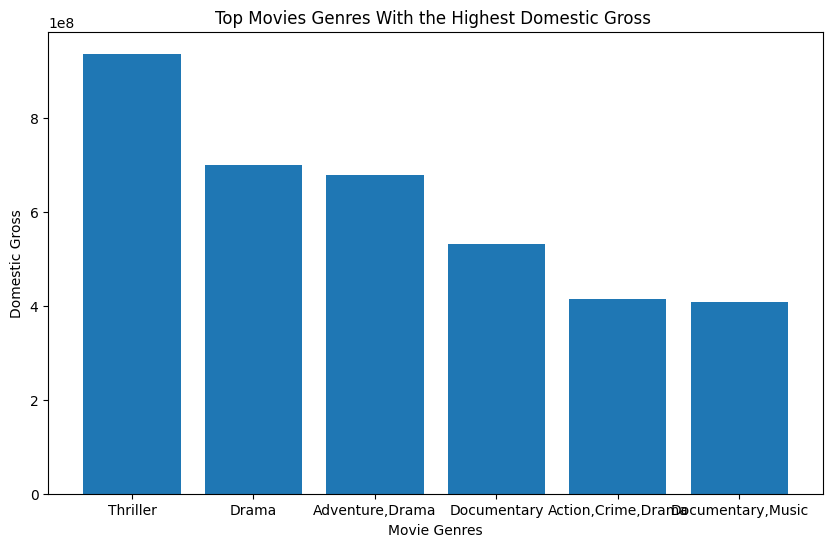

In [388]:
#plotting a graph with the movies with the higest domestic gross.
#getting the top five domestic gross profit that was accrued
top_domestic_gross = top_gross_df['domestic_gross'].head(10).tolist()

#getting the best movie titles that had highest domestic gross
top_genre = top_gross_df['genres'].head(10).tolist()

#plotting title vs domestic gross in gross csv
bar_chart_title = 'Top Movies Genres With the Highest Domestic Gross '
bar_chart_movie_label = 'Movie Genres'
bar_chart_count_label = 'Domestic Gross'

plot_movie_analysis, ax = plt.subplots(figsize =(10,6))

plt.bar(top_genre, top_domestic_gross)

#adding title and labels
plt.title(bar_chart_title)
plt.xlabel(bar_chart_movie_label)
plt.ylabel(bar_chart_count_label)

plt.show()


The above graph shows the relationship between the top five movie genre with the highest domestic gross income which indicates that thriller,drama and adventure genres return the highest domestic profit which are the best to venture in. 

### 5.2 Basics_df

In [401]:
#selecting relevant columns to use in gross
#Creating a new dataframe with the selected columns.
new_basics_df = budgets_and_basics[['genres', 'production_budget']]
new_basics_df.head()

,genres,production_budget
0,"Action,Crime,Drama","$425,000,000"
1,"Biography,Drama","$410,600,000"
2,Drama,"$350,000,000"
4,"Comedy,Drama,Fantasy","$317,000,000"
5,Comedy,"$306,000,000"


In [412]:
#replacing the dollar sign and comma with an empty string and the converting the column to a float datatype
new_basics_df.loc[:, 'production_budget'] = new_basics_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)

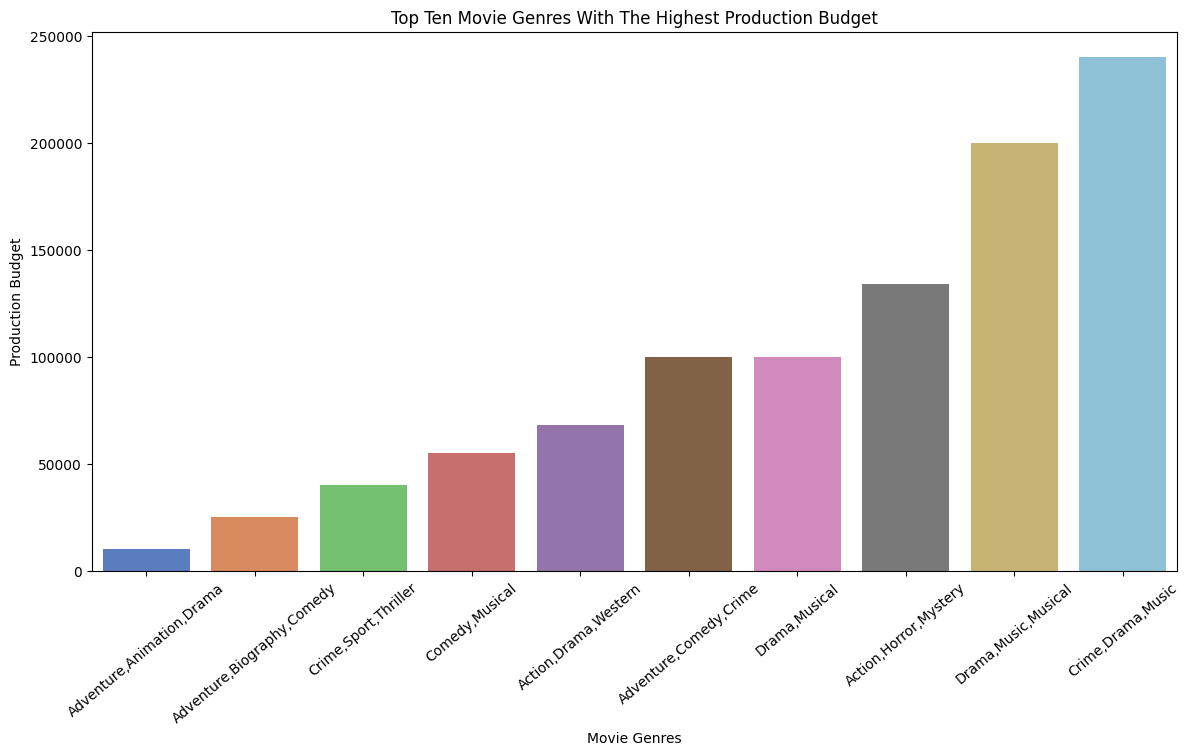

In [414]:
#grouping production_budget and genre columns and calculatin#g the mean of each group
#sets the values in descending order and selects top ten genres.
genre_df = new_basics_df.groupby('genres')['production_budget'].mean().sort_values(ascending = )[:10]
#creating a new figure with size 14 inches by 7 inches
fig, ax =plt.subplots(figsize=(14,7))
#creating a new variable order-by and assigning it to the index of genre dataframe.
order_by = genre_df.index
#creating a bar plot using seaborn with selected genres and production budget on x and y axis respectively
sns.barplot(data =new_basics_df[new_basics_df['genres'].isin(order_by)], x='genres', y='production_budget', palette='muted', order=order_by, ax=ax)
#setting the title and x,y labels
ax.set_title('Top Ten Movie Genres With The Highest Production Budget')
ax.set_xlabel('Movie Genres')
ax.set_ylabel('Production Budget')
#rotatingthe x-axis labels by 40 degrees
plt.xticks(rotation=40);


The data shows that animation,adventure, action, romance, science-fiction and drama movies have the highest product cost.

### 5.3 Ratings_df

In [383]:
#filtering ratings_df to have movie genres with more than 1500 number of votes
new_rating_df = ratings_and_basics.loc[ratings_and_basics['numvotes']>1500]
#sorting values and displaying top ten movies with more than 1500 votes
new_rating_df = new_rating_df.sort_values(by=['numvotes', 'averagerating'], ascending=False)[:10]
new_rating_df.reset_index()

,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2152,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,2017,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
2,250,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
3,11036,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
4,289,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
5,452,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358
6,954,tt1130884,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller",8.1,1005960
7,13971,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",8.1,948394
8,2561,tt1431045,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy",8.0,820847
9,2276,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",7.2,795227


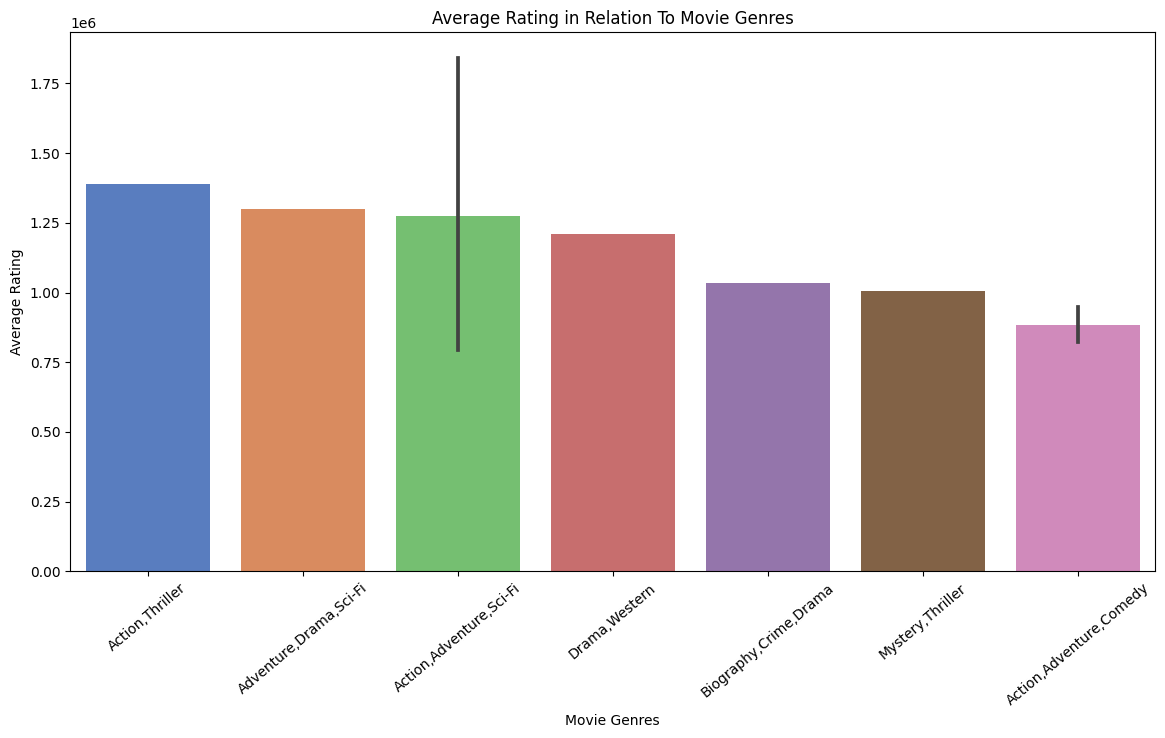

In [382]:
genre_ratings_df = new_rating_df.groupby('genres')['numvotes'].mean().sort_values(ascending = False)
fig, ax =plt.subplots(figsize=(14,7))
order_by = new_rating_df.groupby('genres')['numvotes'].mean().sort_values(ascending=False).index
sns.barplot(data =new_rating_df, x='genres', y='numvotes', palette='muted', order=order_by, ax=ax)
ax.set_title('Average Rating in Relation To Movie Genres')
ax.set_xlabel('Movie Genres')
ax.set_ylabel('Average Rating')
plt.xticks(rotation=40);

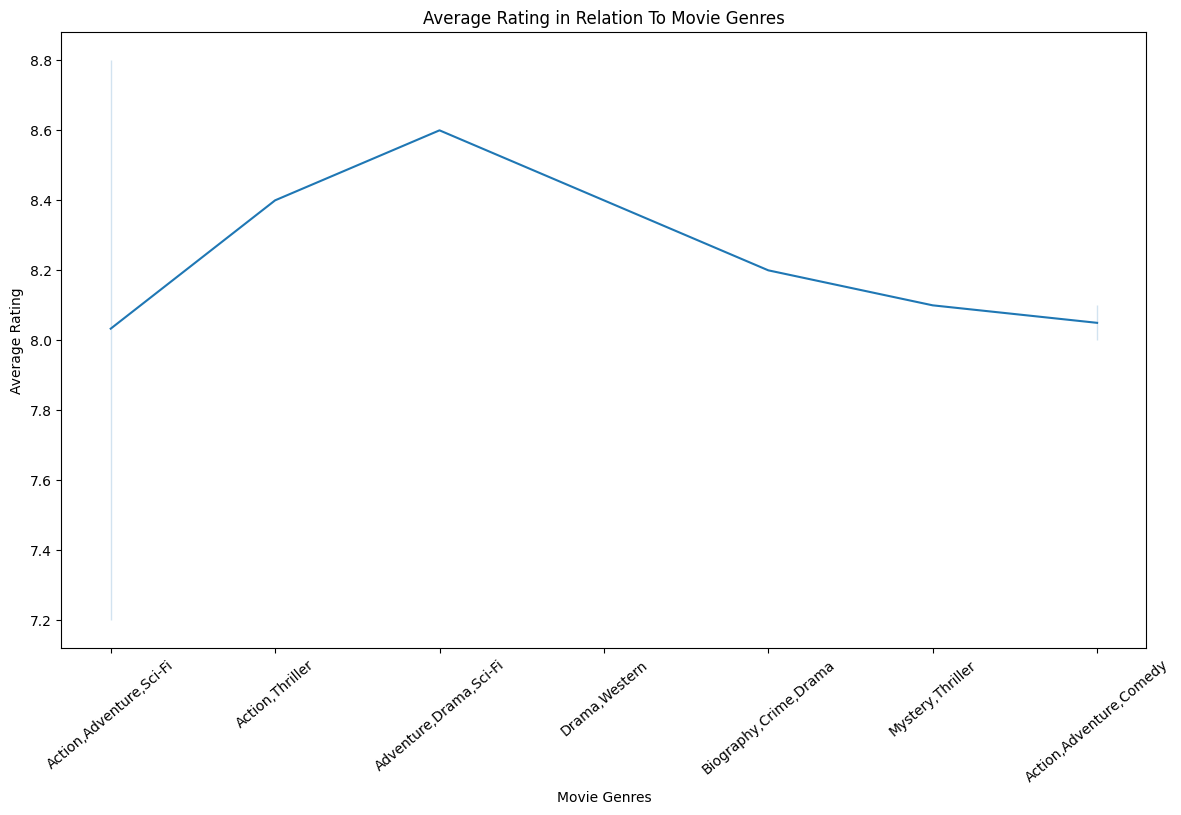

In [384]:
#Creating a new dataframe with genre 
genre_ratings_df = new_rating_df.groupby('genres')['averagerating'].mean().sort_values(ascending = False)
#plotting genres and averagerating
fig, ax = plt.subplots(figsize=(14,8))
order_by = new_rating_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False).index
sns.lineplot(data=new_rating_df, x='genres', y='averagerating', ax=ax)
#adding labels and title
ax.set_title('Average Rating in Relation To Movie Genres')
ax.set_xlabel('Movie Genres')
ax.set_ylabel('Average Rating')
plt.xticks(rotation=40);



This shows the title of movies that were voted for with most people which influenced the ratings.
This also means that most people watched the movies.

# 6.Conclusions
 - Action, Science-fiction and adventure movies are the best to invest in for one to get more domestic gross income while drama movies have low domestic income
 - The number of people watching a movie will detamine the average rating of the movie from their votes.
 

# 7.Recommendation
